### Notebook oficial para analise exploratória e entendimento dos dados

É necessatio utilizar o kenel kedro proprio do projeto KOBE

In [31]:
import matplotlib.pyplot as plt
import pandas as pd


In [ ]:

#Dataset raw de treinamento
raw_train = catalog.load("raw_train")

#Dataset raw de produção
raw_prod = catalog.load("raw_prod")

#Dataset filtrado apenas com features utilizadas no projeto e com os nulos limpos
data_filtered = catalog.load("data_filtered")
  
#Derivaçao do Dataset data_filtrade com sepearção extratificada 80% para treinamento
train_set = catalog.load("train_set")

#Derivaçao do Dataset data_filtrade com sepearção extratificada 20% para teste
test_set = catalog.load("test_set")

#Resultado da prediçao final base de produçao com modelo servido
predictions = catalog.load("predictions")

#Modelos salvaos fisicamente:
  #filepath: data/06_models/tuned_model_dt.pkl
  #filepath: data/06_models/tuned_model_lr.pkl

[04/08/25 22:03:11] INFO     Loading data from raw_train (ParquetDataset)...                    ]8;id=600049;file://c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=19281;file://c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\kedro\io\data_catalog.py#401\401]8;;\

[04/08/25 22:03:12] INFO     Loading data from raw_prod (ParquetDataset)...                     ]8;id=880087;file://c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=686726;file://c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\kedro\io\data_catalog.py#401\401]8;;\

                    INFO     Loading data from data_filtered (ParquetDataset)...                ]8;id=361643;file://c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=261321;file://c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\kedro\io\data_catalog.py#401\401]8;;\

                    INFO     Loading data from train_set (ParquetDataset)...                    ]8;id=417366;file://c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=75861;file://c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\kedro\io\data_catalog.py#401\401]8;;\

                    INFO     Loading data from test_set (ParquetDataset)...                     ]8;id=295538;file://c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=998269;file://c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\kedro\io\data_catalog.py#401\401]8;;\

                    INFO     Loading data from predictions (ParquetDataset)...                  ]8;id=226692;file://c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=428930;file://c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\kedro\io\data_catalog.py#401\401]8;;\

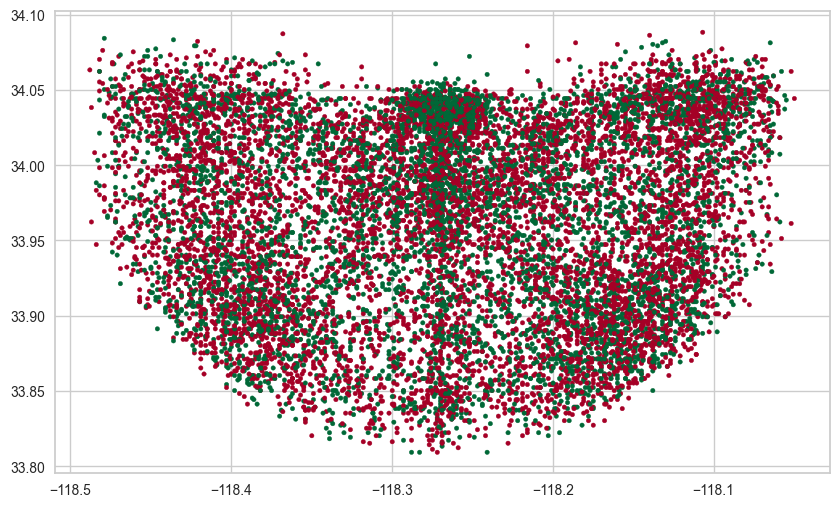

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(train_set['lon'], train_set['lat'], c=train_set['shot_made_flag'], cmap='RdYlGn', s=10)

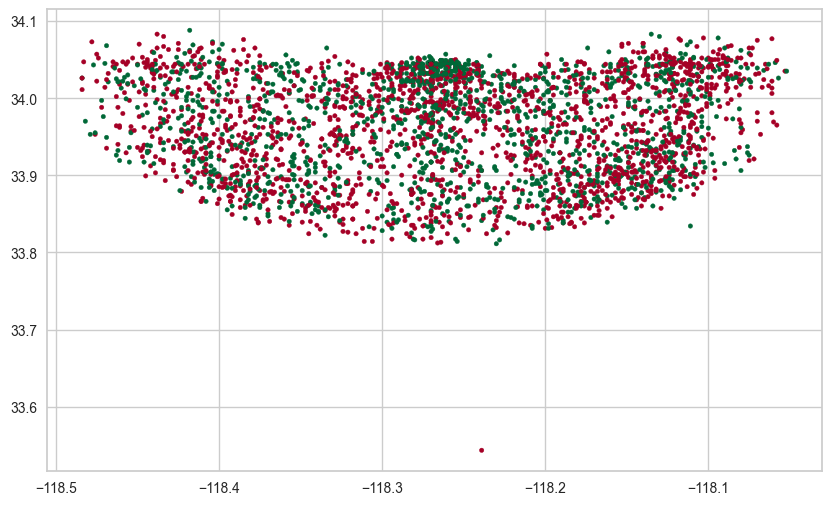

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(test_set['lon'], test_set['lat'], c=test_set['shot_made_flag'], cmap='RdYlGn', s=10)

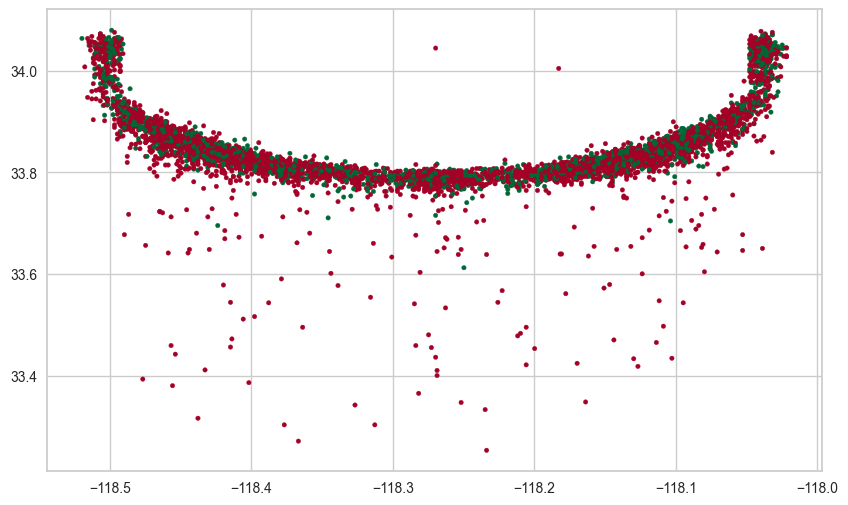

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(raw_prod['lon'], raw_prod['lat'], c=raw_prod['shot_made_flag'], cmap='RdYlGn', s=10)

### Abaixo a visão grafiaca da distribuiçao lon e lat dos datasets treino, teste e produçao.
### No grafico fica muito claro que os dados de produçao tem caracteristicas distindas dos dados de teste e treino e por isso o modelo não consegiu generalizar bem com os dados produtivos.


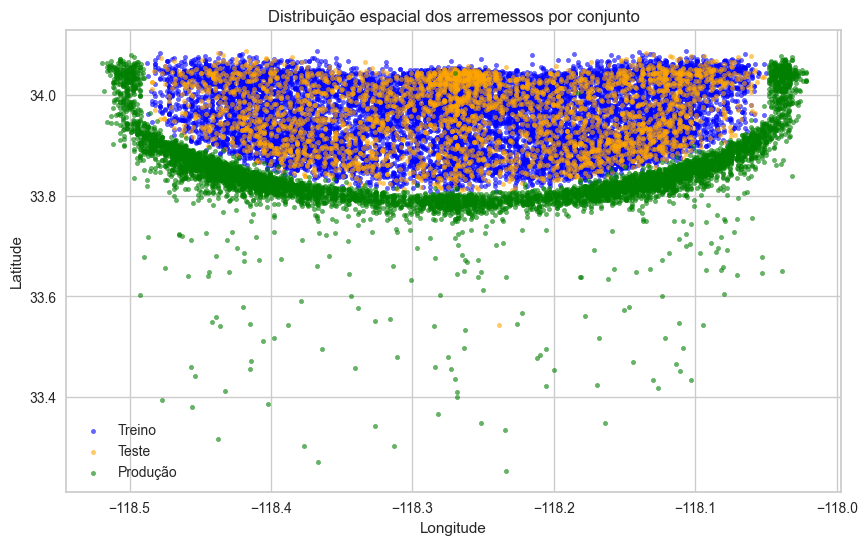

In [36]:

plt.figure(figsize=(10, 6))

# Plotar treino
plt.scatter(train_set['lon'], train_set['lat'], 
            c='blue', label='Treino', s=10, alpha=0.6)

# Plotar teste
plt.scatter(test_set['lon'], test_set['lat'], 
            c='orange', label='Teste', s=10, alpha=0.6)

# Plotar produção
plt.scatter(raw_prod['lon'], raw_prod['lat'], 
            c='green', label='Produção', s=10, alpha=0.6)

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Distribuição espacial dos arremessos por conjunto')
plt.legend()
plt.grid(True)
plt.show()

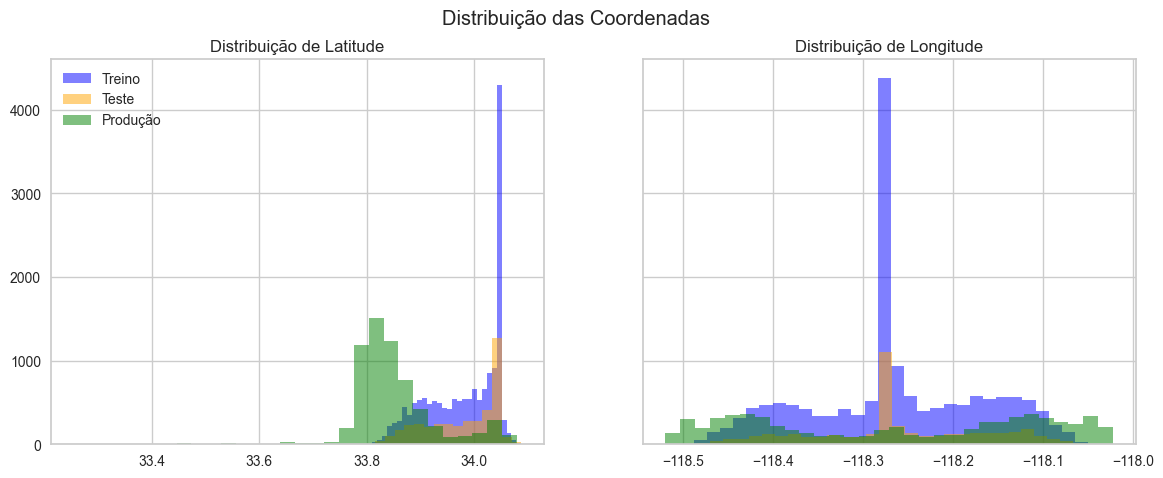

In [34]:
fig, axs = plt.subplots(1, 2, figsize=(14, 5), sharey=True)

# Latitude
axs[0].hist(train_set['lat'], bins=30, alpha=0.5, label='Treino', color='blue')
axs[0].hist(test_set['lat'], bins=30, alpha=0.5, label='Teste', color='orange')
axs[0].hist(raw_prod['lat'], bins=30, alpha=0.5, label='Produção', color='green')
axs[0].set_title('Distribuição de Latitude')
axs[0].legend()

# Longitude
axs[1].hist(train_set['lon'], bins=30, alpha=0.5, label='Treino', color='blue')
axs[1].hist(test_set['lon'], bins=30, alpha=0.5, label='Teste', color='orange')
axs[1].hist(raw_prod['lon'], bins=30, alpha=0.5, label='Produção', color='green')
axs[1].set_title('Distribuição de Longitude')

plt.suptitle("Distribuição das Coordenadas")
plt.show()

In [30]:
import plotly.express as px
import pandas as pd

train = train_set.copy(); train['dataset'] = 'Treino'
test = test_set.copy(); test['dataset'] = 'Teste'
prod = raw_prod.copy(); prod['dataset'] = 'Produção'

combined = pd.concat([train, test, prod])
fig = px.scatter(combined, x='lon', y='lat', color='dataset',
                 title='Distribuição espacial por conjunto',
                 opacity=0.6)
fig.show()

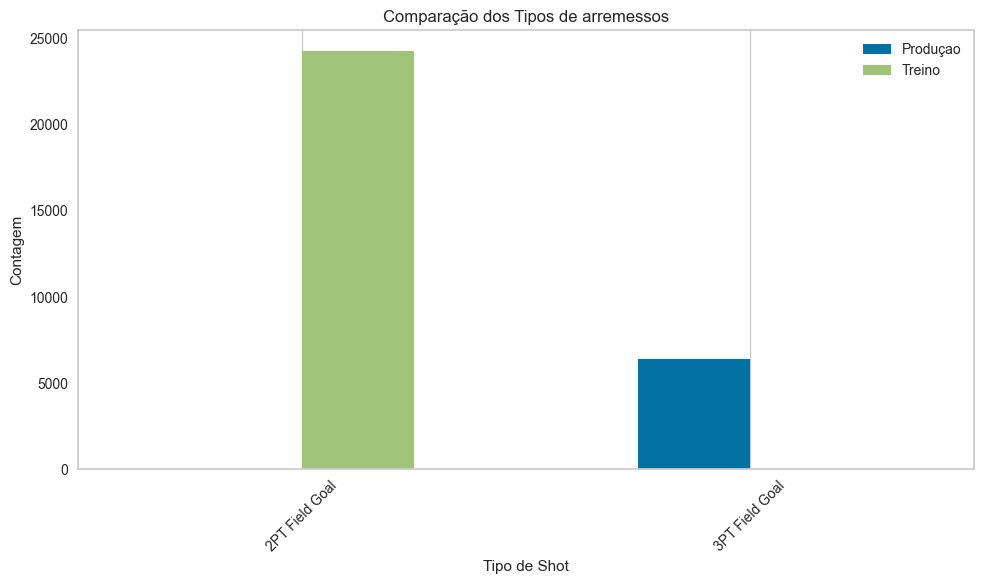

In [37]:
# Contagem dos tipos de shots
prd = raw_prod['shot_type'].value_counts()
train = raw_train['shot_type'].value_counts()

# Juntando as contagens em um DataFrame
df = pd.DataFrame({'Produçao': prd, 'Treino': train}).fillna(0)

# Criando o gráfico
df.plot(kind='bar', figsize=(10,6))
plt.title('Comparação dos Tipos de arremessos')
plt.xlabel('Tipo de Shot')
plt.ylabel('Contagem')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [24]:
print(prd)
print('###################')
print(train)
print('###################')


shot_type
3PT Field Goal    6426
Name: count, dtype: int64
###################
shot_type
2PT Field Goal    24271
Name: count, dtype: int64
###################
